In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df1 = pd.read_csv("datasets/Historico_velocidad_bajada_nacional.csv")

In [34]:
df1.head()

,Mbps (Media de bajada),Trimestre_año
0,62.46,2022 3
1,58.44,2022 2
2,55.11,2022 1
3,52.34,2021 4
4,48.46,2021 3


In [35]:
df1["Mbps (Media de bajada)"].describe()

count    35.000000
mean     21.827143
std      19.230717
min       3.620000
25%       5.250000
50%      13.850000
75%      39.495000
max      62.460000
Name: Mbps (Media de bajada), dtype: float64

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mbps (Media de bajada)  35 non-null     float64
 1   Trimestre_año           35 non-null     object 
dtypes: float64(1), object(1)
memory usage: 688.0+ bytes


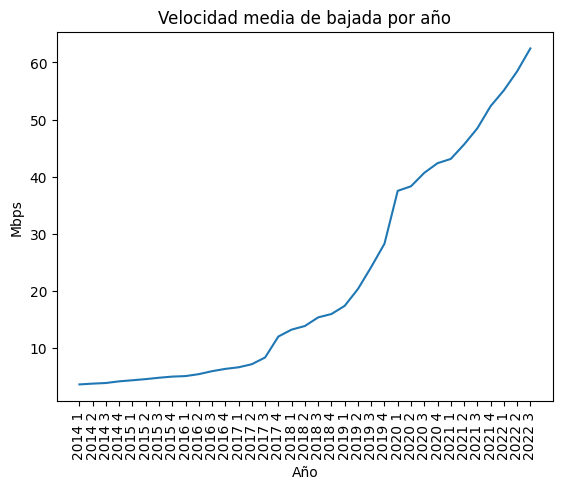

In [37]:
# graficamos la velocidad media de bajada por año además de ver comportamientos extraños e las variables
df_media_anual = df1.groupby('Trimestre_año')['Mbps (Media de bajada)'].mean().reset_index()

plt.plot(df_media_anual['Trimestre_año'], df_media_anual['Mbps (Media de bajada)'])

plt.title('Velocidad media de bajada por año')
plt.xlabel('Año')
plt.ylabel('Mbps')
plt.xticks(rotation=90)
plt.show()

In [38]:
df2 = pd.read_csv("datasets/total_banda_ancha_y_banda_angosta.csv")

In [39]:
df2.head()

,Banda ancha fija,Dial up,Total,Trimestre_año
0,11078691,12437,11091128,2022 3
1,10946248,12436,10958684,2022 2
2,10611390,12619,10624009,2022 1
3,10476933,12861,10489794,2021 4
4,10075184,10357,10085541,2021 3


In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Banda ancha fija  35 non-null     int64 
 1   Dial up           35 non-null     int64 
 2   Total             35 non-null     int64 
 3   Trimestre_año     35 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


In [42]:
df2['Dial up'].describe()

count       35.000000
mean     23383.371429
std      10087.397193
min       9991.000000
25%      12436.500000
50%      26911.000000
75%      32508.500000
max      39324.000000
Name: Dial up, dtype: float64

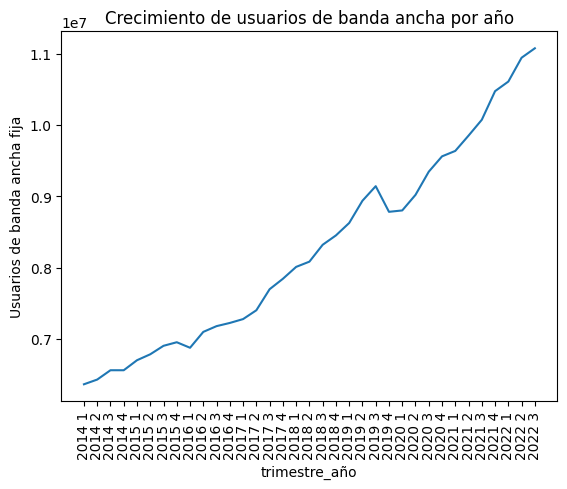

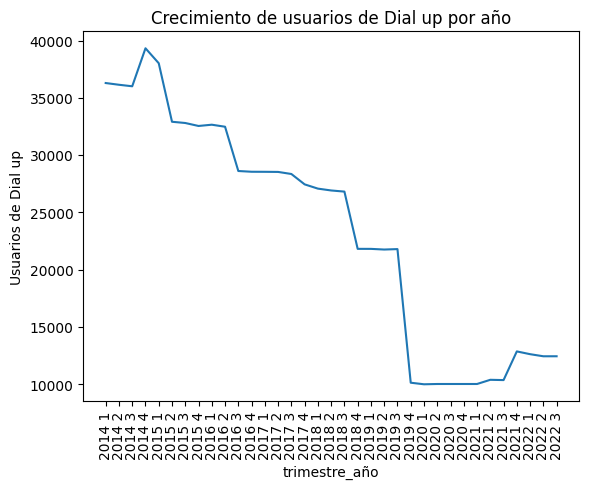

In [43]:
df_banda = df2.groupby('Trimestre_año')['Banda ancha fija'].mean()
df_dialup = df2.groupby('Trimestre_año')['Dial up'].mean()

# Aqui podemos notar que el crecimiento de de usuarios de banda ancha guarda cierta relacion con el crecimiento de velocidad media de bajada
plt.plot(df_banda.index, df_banda.values)
plt.xlabel('trimestre_año')
plt.ylabel('Usuarios de banda ancha fija')
plt.title('Crecimiento de usuarios de banda ancha por año')
plt.xticks(rotation=90)
plt.show()

# En este grafico se pueden ver dos grandes caidas en los usuarios de dial up, y dos fuertes recuperaciones, dichas caidas pueden interpretarse como outliers
plt.plot(df_dialup.index, df_dialup.values)
plt.xlabel('trimestre_año')
plt.ylabel('Usuarios de Dial up')
plt.title('Crecimiento de usuarios de Dial up por año')
plt.xticks(rotation=90)
plt.show()

In [51]:
df3 = pd.read_csv("datasets/penetración_por_provincia.csv")

In [52]:
df3.head()

,Provincia,Accesos por cada 100 hogares,Trimestre_año
0,Buenos Aires,78.11,2022 3
1,Capital Federal,122.28,2022 3
2,Catamarca,65.33,2022 3
3,Chaco,43.86,2022 3
4,Chubut,84.38,2022 3


In [53]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provincia                     840 non-null    object 
 1   Accesos por cada 100 hogares  840 non-null    float64
 2   Trimestre_año                 840 non-null    object 
dtypes: float64(1), object(2)
memory usage: 19.8+ KB


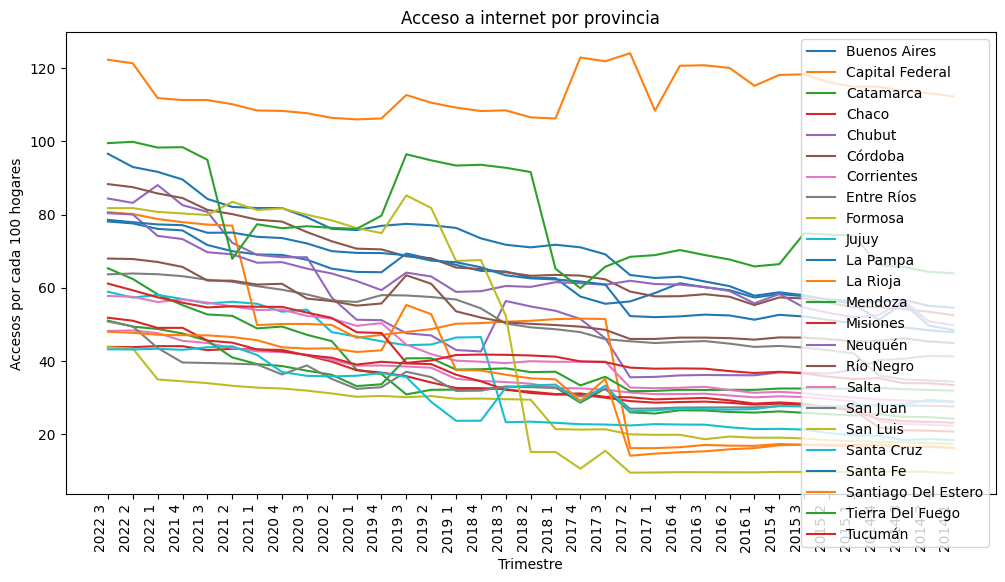

In [54]:
# Podemos ver en este grafico una tendencia creciente de acceso al internet en todas las provincias, siendo San Luis la provincia con mayor crecimiento en este periodo y capital federal
# el lugar con mayor acceso a internet
provincias = df3["Provincia"].unique()

plt.figure(figsize=(12, 6))

for provincia in provincias:
    datos_provincia = df3[df3["Provincia"] == provincia]
    x = datos_provincia["Trimestre_año"]
    y = datos_provincia["Accesos por cada 100 hogares"]
    plt.plot(x, y, label=provincia)

plt.legend()
plt.title("Acceso a internet por provincia")
plt.xlabel("Trimestre")
plt.ylabel("Accesos por cada 100 hogares")
plt.xticks(rotation=90, ha='right')

plt.show()

In [56]:
df4 = pd.read_csv('datasets/internet_fijo_velocidad_provincia.csv')

In [57]:
df4.head()

,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_Suma,Trimestre_Año
0,Buenos Aires,29985,27709,290315,297915,267044,12419,3618689,65821,4609897,2022 3
1,Capital Federal,5170,5742,34371,67829,51946,28692,1253105,105477,1552332,2022 3
2,Catamarca,710,3840,3107,5389,5099,3737,50298,2208,74388,2022 3
3,Chaco,4610,9870,16782,18938,8049,15828,79390,3711,157178,2022 3
4,Chubut,1090,1444,45707,3094,34682,15309,17563,20024,138913,2022 3


In [58]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Provincia            840 non-null    object
 1   HASTA 512 kbps       840 non-null    int64 
 2   + 512 Kbps - 1 Mbps  840 non-null    int64 
 3   + 1 Mbps - 6 Mbps    840 non-null    int64 
 4   + 6 Mbps - 10 Mbps   840 non-null    int64 
 5   + 10 Mbps - 20 Mbps  840 non-null    int64 
 6   + 20 Mbps - 30 Mbps  840 non-null    int64 
 7   + 30 Mbps            840 non-null    int64 
 8   OTROS                840 non-null    int64 
 9   Total_Suma           840 non-null    int64 
 10  Trimestre_Año        840 non-null    object
dtypes: int64(9), object(2)
memory usage: 72.3+ KB


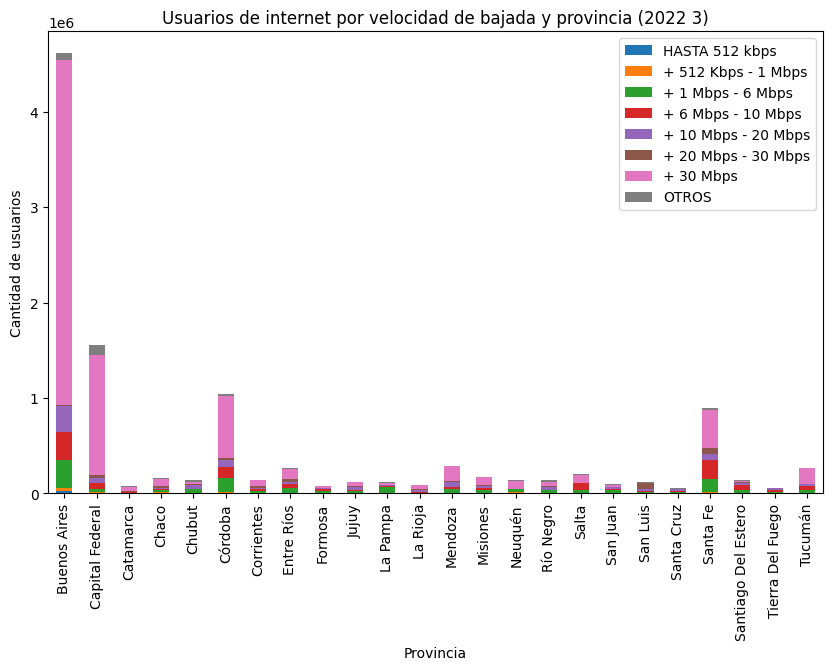

In [61]:
df = df4[df4["Trimestre_Año"] == "2022 3"]
velocidades = ["HASTA 512 kbps", "+ 512 Kbps - 1 Mbps", "+ 1 Mbps - 6 Mbps", "+ 6 Mbps - 10 Mbps", "+ 10 Mbps - 20 Mbps", "+ 20 Mbps - 30 Mbps", "+ 30 Mbps", "OTROS"]

ax = df.set_index("Provincia")[velocidades].plot(kind="bar", stacked=True, figsize=(10,6))
ax.set_ylabel("Cantidad de usuarios")
ax.set_title("Usuarios de internet por velocidad de bajada y provincia (2022 3)")

plt.show()

- Segmentamos la muestra para ver el ultimo trimestre que se encuentra en el dataset, el tercer trimestre de 2022, podemos observar como el + 30 Mbps es el preferido por los usuarios, principalmente en Buenos Aires, Capital Federal, Córdoba y Santa fe.

C:\Users\araqu\AppData\Local\Temp\ipykernel_19784\181719077.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df4.groupby(["Trimestre_Año"]).sum()


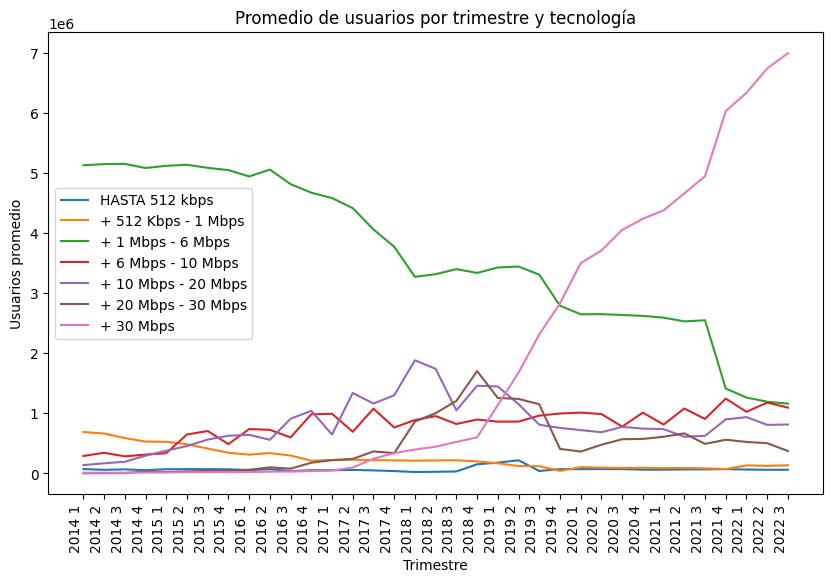

In [63]:

df_grouped = df4.groupby(["Trimestre_Año"]).sum()

tech_cols = df4.columns[1:8]

fig, ax = plt.subplots(figsize=(10,6))

for tech in tech_cols:
    ax.plot(df_grouped.index, df_grouped[tech], label=tech)

ax.set_title("Promedio de usuarios por trimestre y tecnología")
ax.set_xlabel("Trimestre")
ax.set_ylabel("Usuarios promedio")
ax.legend()
plt.xticks(rotation=90, ha='right')
plt.show()

- En el grafico anterior podemos ver como a partir del 2019 se viene dando un rapido crecimiento de los usuarios de "más de 30 Mbps" y a su vez como el segmento de entre 1 y 6 Mbps disminuye drasticamente.

In [64]:
df5 = pd.read_csv('Datasets/total_nacional_accesos_internet_tecnología.csv')

In [65]:
df5.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_Suma,Trimestre_Año
0,2022,3,1395277,6031970,2871541,55711,23523,10378022,2022 3
1,2022,2,1468333,5979214,2723285,5562430,2316090,18049352,2022 2
2,2022,1,1533240,6073426,2219533,5458140,2519960,17804299,2022 1
3,2021,4,1657615,5984240,2072236,5231070,2525960,17471121,2021 4
4,2021,3,1950631,5826257,1566048,4924150,25019,14292105,2021 3


In [66]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Año            35 non-null     int64 
 1   Trimestre      35 non-null     int64 
 2   ADSL           35 non-null     int64 
 3   Cablemodem     35 non-null     int64 
 4   Fibra óptica   35 non-null     int64 
 5   Wireless       35 non-null     int64 
 6   Otros          35 non-null     int64 
 7   Total_Suma     35 non-null     int64 
 8   Trimestre_Año  35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


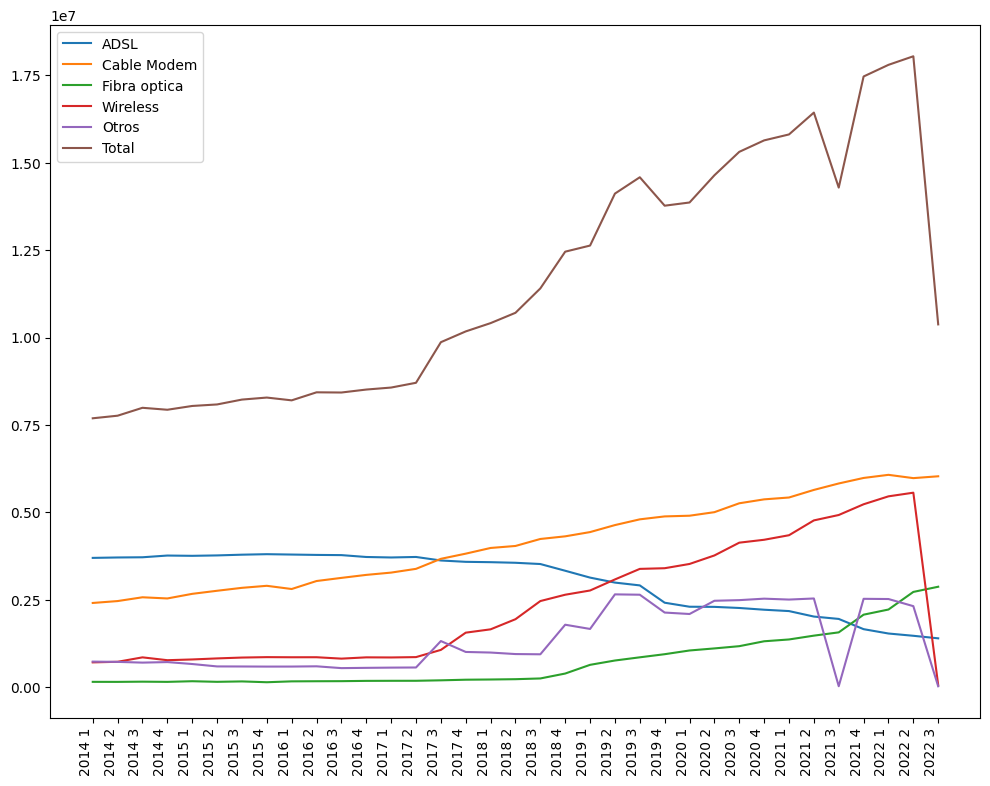

In [68]:
df = df5.sort_values(by='Trimestre_Año')

plt.figure(figsize=(12, 9))
plt.plot(df['Trimestre_Año'], df['ADSL'], label='ADSL')
plt.plot(df['Trimestre_Año'], df['Cablemodem'], label='Cable Modem')
plt.plot(df['Trimestre_Año'], df['Fibra óptica'], label='Fibra optica')
plt.plot(df['Trimestre_Año'], df['Wireless'], label='Wireless')
plt.plot(df['Trimestre_Año'], df['Otros'], label='Otros')
plt.plot(df['Trimestre_Año'], df['Total_Suma'], label='Total')

plt.xticks(rotation=90, ha='right')
plt.legend()
plt.show()

- El Anterior grafico muestra la tendencia creciente de las tecnologias cablemodem y fibra optica, mientras que otras tecnologias, están perdiendo vigencia como lo es el Wireless o inalambrico, se puede apreciar la necesidad de estar siempre al tanto de las tecnologias mas modernas para poder seguir creciendo.